<a href="https://colab.research.google.com/github/ArthurCBx/Applied_Data_Representation_Coursera/blob/main/Module4/Applied_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting with Pandas

It uses matplotlib in the backend

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [ ]:
plt.style.use('seaborn-v0_8-colorblind')

In [ ]:
np.random.seed(123)

df = pd.DataFrame({
    'A': np.random.randn(365).cumsum(0),
    'B': np.random.randn(365).cumsum(0) + 20,
    'C': np.random.randn(365).cumsum(0) - 20},
                index=pd.date_range('1/1/2017', periods=365)
                  )
df.head()

,A,B,C
2017-01-01,-1.085631,20.059291,-20.230904
2017-01-02,-0.088285,21.803332,-16.659325
2017-01-03,0.194693,20.835588,-17.055481
2017-01-04,-1.311601,21.255156,-17.093802
2017-01-05,-1.890202,21.462083,-19.518638


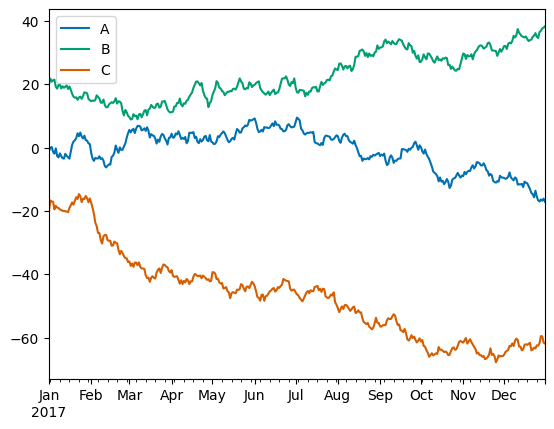

In [ ]:
%matplotlib inline
df.plot();

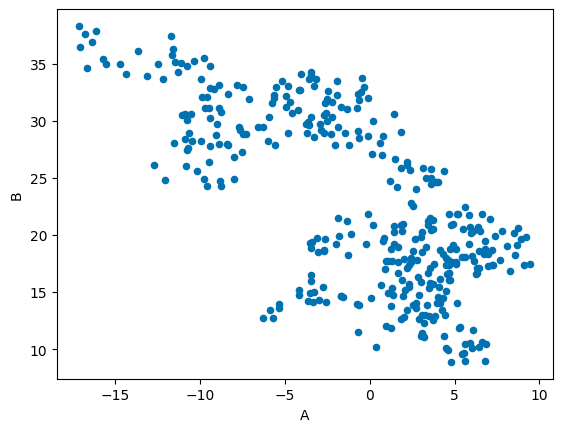

In [ ]:
df.plot('A','B',kind='scatter');

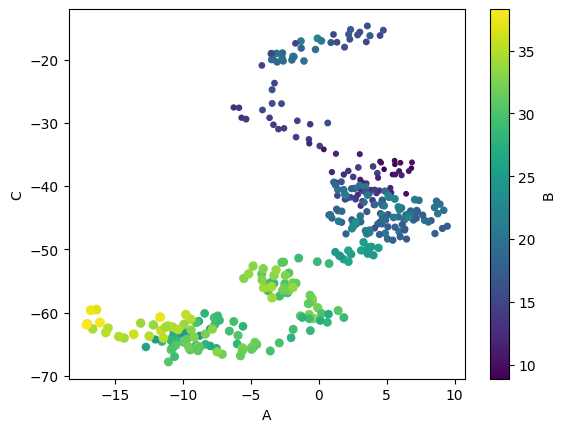

In [ ]:
# This plots A and C with the colors varying with the value of B
# The size s also varies with the value of B
df.plot.scatter('A','C',c='B', s=df['B'],colormap='viridis');

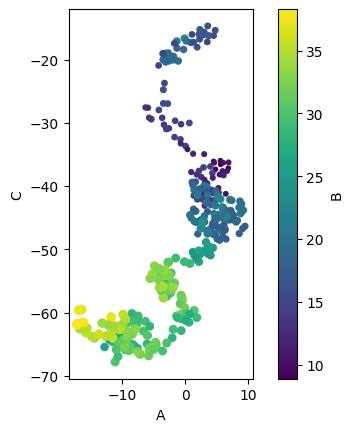

In [ ]:
ax = df.plot.scatter('A','C',c='B', s=df['B'],colormap='viridis')
ax.set_aspect('equal')

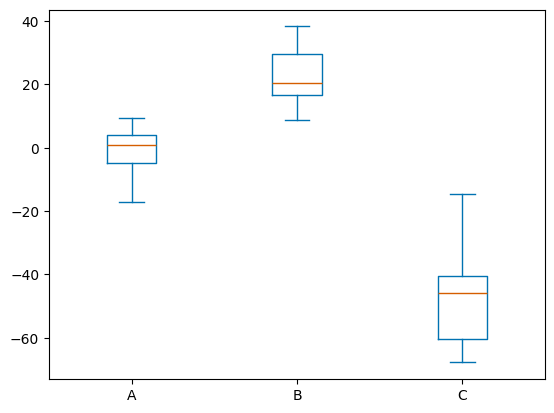

In [ ]:
df.plot.box();

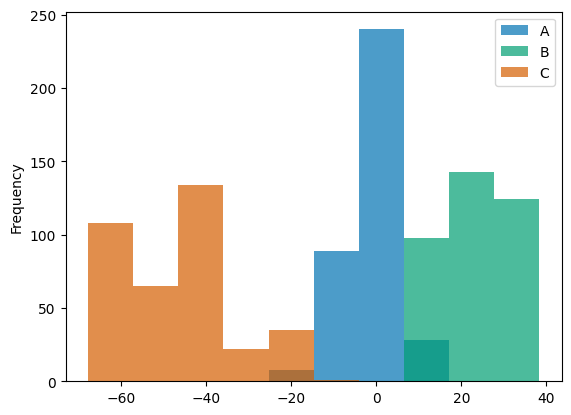

In [ ]:
df.plot.hist(alpha=0.7);


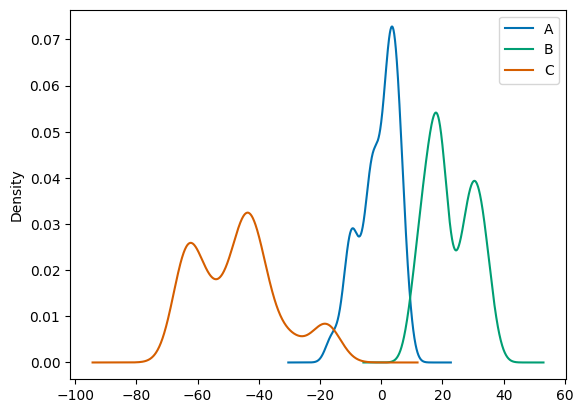

In [ ]:
df.plot.kde();

## Pandas tools plotting

In [ ]:
!git clone https://github.com/ArthurCBx/Applied_Data_Representation_Coursera.git

Cloning into 'Applied_Data_Representation_Coursera'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 65 (delta 21), reused 37 (delta 8), pack-reused 0 (from 0)
Receiving objects: 100% (65/65), 14.39 MiB | 15.11 MiB/s, done.
Resolving deltas: 100% (21/21), done.


In [ ]:
iris = pd.read_csv('Applied_Data_Representation_Coursera/Module3/data/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


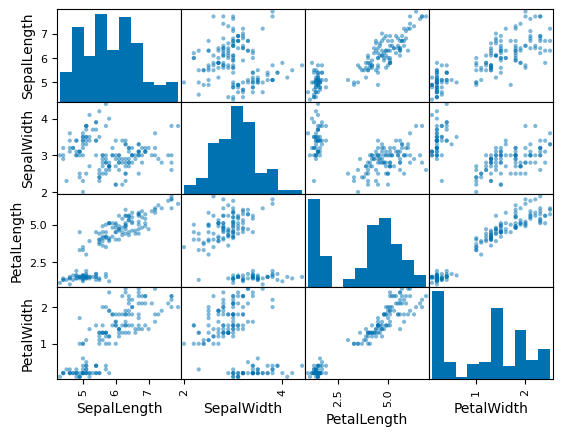

In [ ]:
pd.plotting.scatter_matrix(iris);

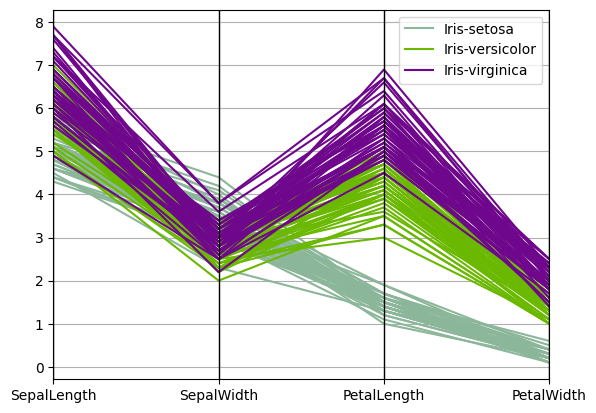

In [ ]:
plt.figure()
pd.plotting.parallel_coordinates(iris,'Name');

# Seaborn

In [ ]:
import seaborn as sns
np.random.seed(1234)

%matplotlib inline
v1 = pd.Series(np.random.normal(0,10,1000), name='v1')
v2 = pd.Series(2*v1 + np.random.normal(60,15,1000), name='v2')


<IPython.core.display.Javascript object>

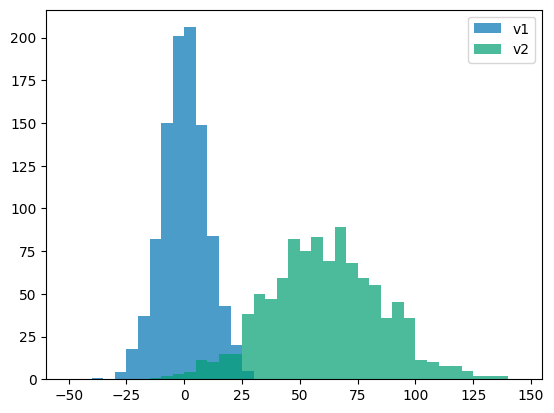

In [ ]:
plt.figure()
plt.hist(v1,alpha=0.7,bins=np.arange(-50,150,5),label='v1');
plt.hist(v2,alpha=0.7,bins=np.arange(-50,150,5),label='v2');
plt.legend();

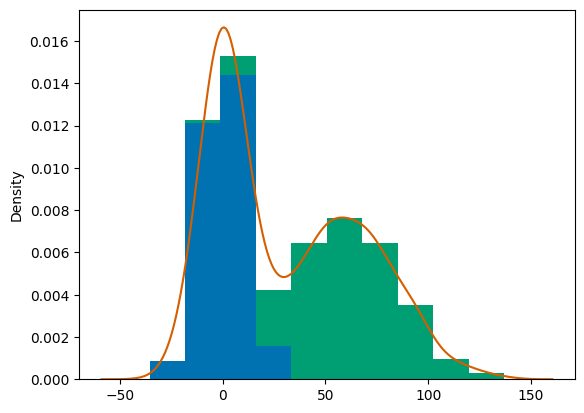

In [ ]:
plt.figure()
plt.hist([v1,v2],histtype='barstacked',density=True); # normed normalizes the histogram to form
                                                     # a probability density

v3 = np.concatenate((v1,v2))
sns.kdeplot(v3);

/tmp/ipython-input-2265034936.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v3,hist_kws={'color':'Teal'},kde_kws={'color':'Navy'});


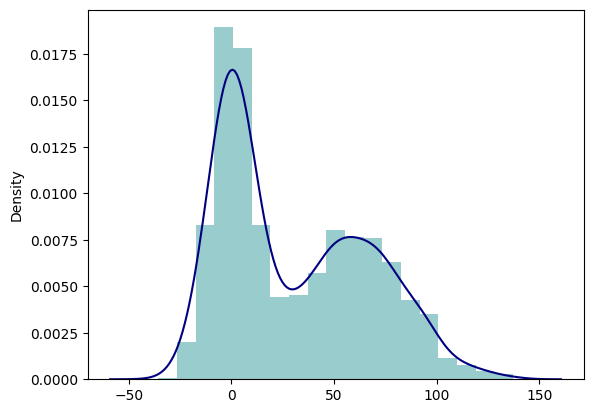

In [ ]:
plt.figure()
sns.distplot(v3,hist_kws={'color':'Teal'},kde_kws={'color':'Navy'});

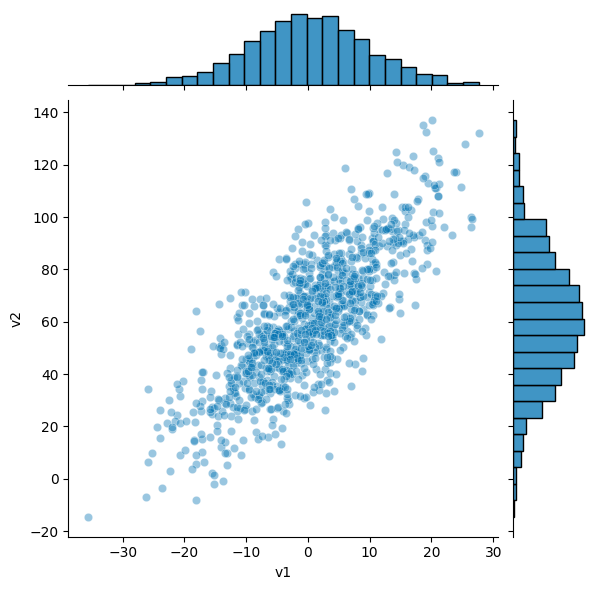

In [ ]:
sns.jointplot(x=v1,y=v2,alpha=0.4);

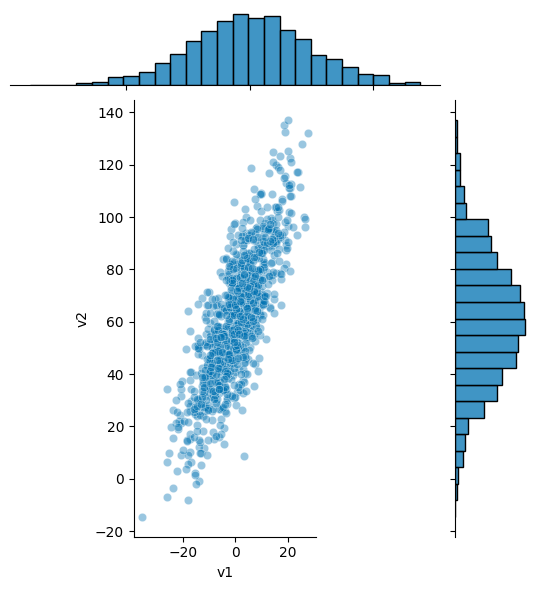

In [ ]:
grid = sns.jointplot(x=v1, y=v2, alpha=0.4);
grid.ax_joint.set_aspect('equal')

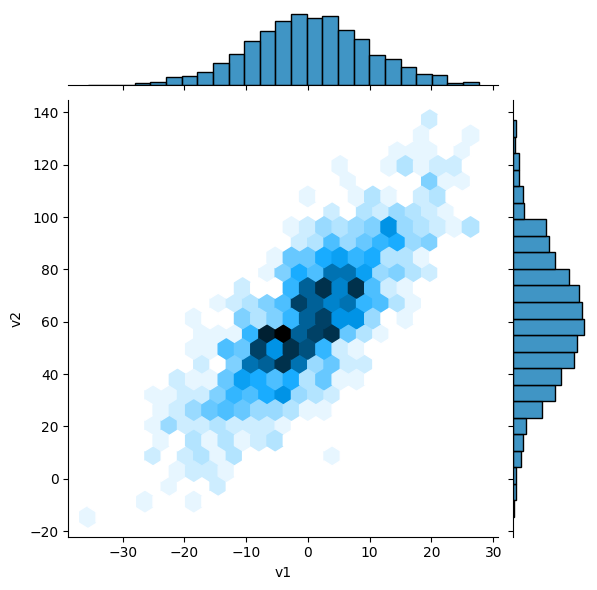

In [ ]:
sns.jointplot(x=v1, y=v2, kind='hex');

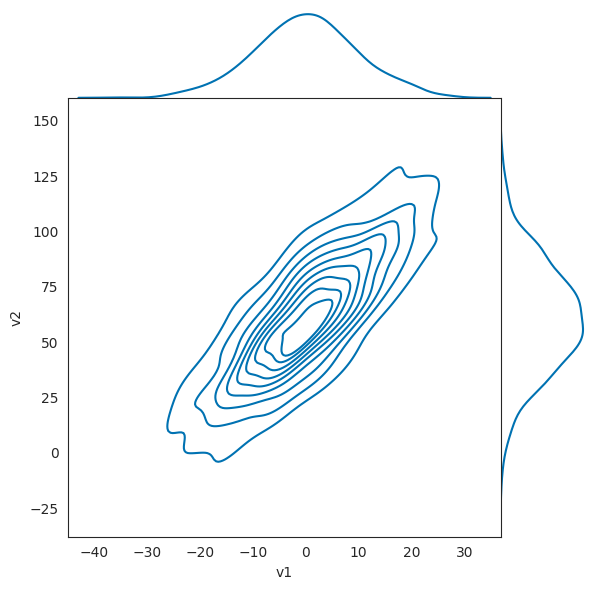

In [ ]:
sns.set_style('white')

sns.jointplot(x=v1, y=v2, kind='kde', space=0);

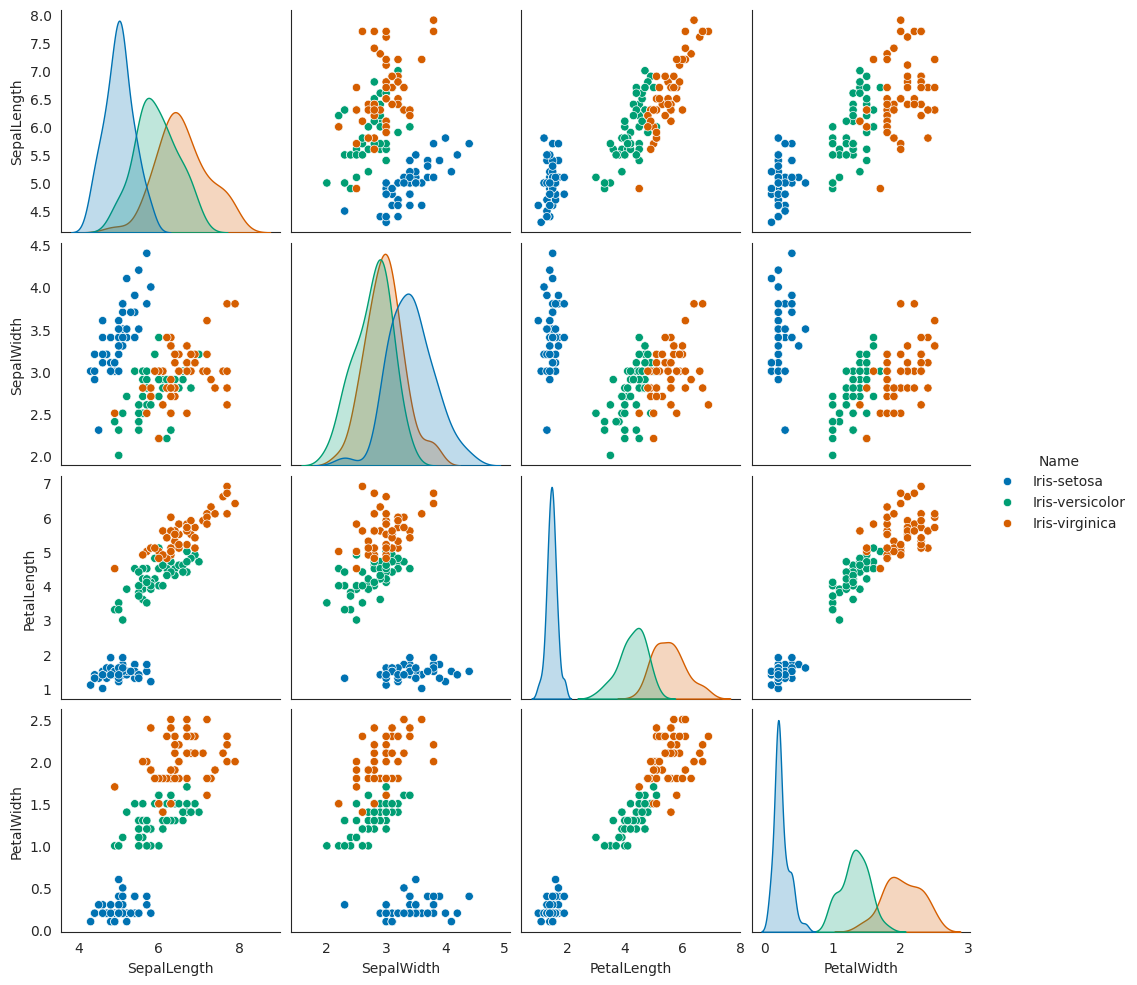

In [ ]:
# hue maps names to different colors
sns.pairplot(iris,hue='Name', diag_kind='kde');

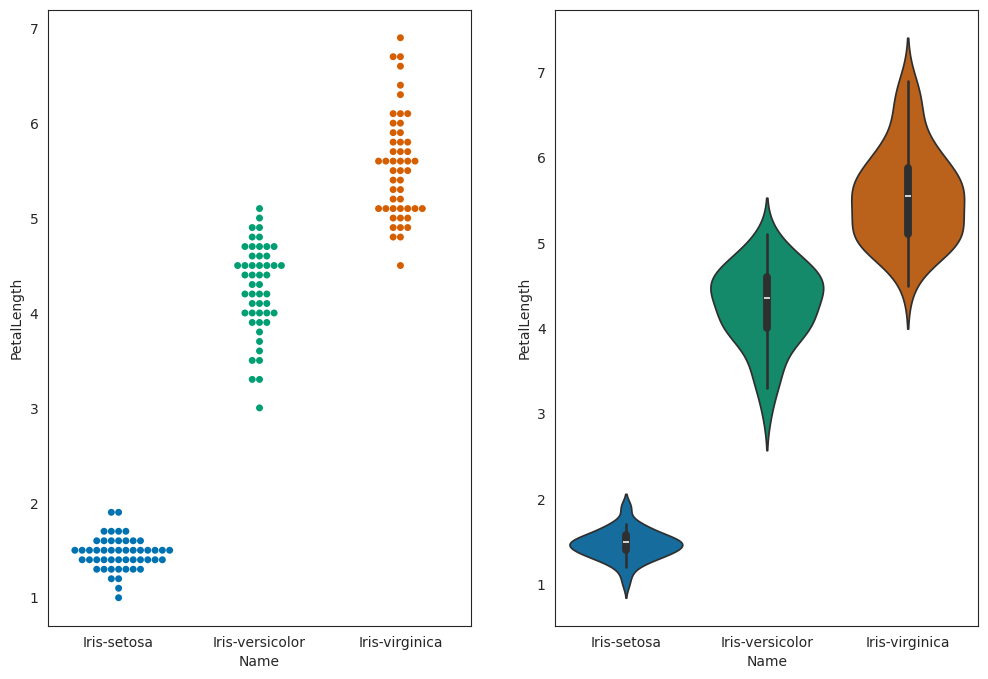

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(121)
sns.swarmplot(x='Name',y='PetalLength',data=iris,hue='Name');
plt.subplot(122)
sns.violinplot(x='Name',y='PetalLength',data=iris,hue='Name');

# Mapping and Geographic Investigation

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = [16.0,8.0]
df = pd.read_csv('Applied_Data_Representation_Coursera/Module3/data/wipeout.csv')
df.head()

,timestamp,cadence,distance,enhanced_altitude,enhanced_speed,fractional_cadence,heart_rate,position_lat,position_long,speed,timestamp.1,position_lat_degrees,position_long_degrees
0,2019-11-01 20:12:03,NaN,0.00,281.6,0.000,NaN,84.0,504424439.0,-999065791.0,NaN,2019-11-01 20:12:03,42.280368,-83.740727
1,2019-11-01 20:12:04,NaN,0.00,281.6,0.000,NaN,84.0,504424439.0,-999065791.0,NaN,2019-11-01 20:12:04,42.280368,-83.740727
2,2019-11-01 20:12:07,NaN,0.00,281.6,0.000,NaN,87.0,504424439.0,-999065791.0,NaN,2019-11-01 20:12:07,42.280368,-83.740727
3,2019-11-01 20:12:08,NaN,0.32,281.6,1.036,NaN,88.0,504424447.0,-999065835.0,NaN,2019-11-01 20:12:08,42.280369,-83.740731
4,2019-11-01 20:12:10,NaN,3.30,281.8,2.976,NaN,89.0,504424476.0,-999066382.0,NaN,2019-11-01 20:12:10,42.280371,-83.740777


In [ ]:
df['position_lat_degrees'] = df['position_lat'] * (180/2**31)
df['position_long_degrees'] = df['position_long'] * (180/2**31)

# To use the mercantor projection on a map we do as follows
import math
def lat2y(a):
  return 180.0/math.pi*math.log(math.tan(math.pi/4.0 + a*(math.pi/180.0)/2.0))
df['position_lat_degrees_mercantor'] = df['position_lat_degrees'].apply(lat2y)

df = df[['timestamp','enhanced_altitude','enhanced_speed','heart_rate','position_lat_degrees_mercantor',
        'position_long_degrees','position_lat_degrees']].dropna()

df.head()

,timestamp,enhanced_altitude,enhanced_speed,heart_rate,position_lat_degrees_mercantor,position_long_degrees,position_lat_degrees
0,2019-11-01 20:12:03,281.6,0.000,84.0,46.739975,-83.740727,42.280368
1,2019-11-01 20:12:04,281.6,0.000,84.0,46.739975,-83.740727,42.280368
2,2019-11-01 20:12:07,281.6,0.000,87.0,46.739975,-83.740727,42.280368
3,2019-11-01 20:12:08,281.6,1.036,88.0,46.739976,-83.740731,42.280369
4,2019-11-01 20:12:10,281.8,2.976,89.0,46.739979,-83.740777,42.280371


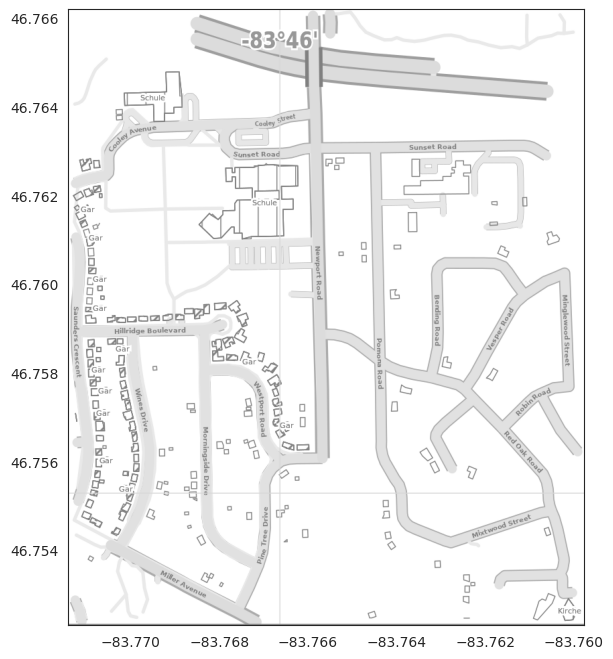

In [ ]:
image = plt.imread('Applied_Data_Representation_Coursera/Module4/map.png')
plt.imshow(image,alpha=0.5,extent=[-83.77141,-83.75977,46.75230,46.76620]);

Text(0.5, 0.98, 'Heart Rate data from 2019-11-01 20:21:28 to 2019-11-01 21:25:05')

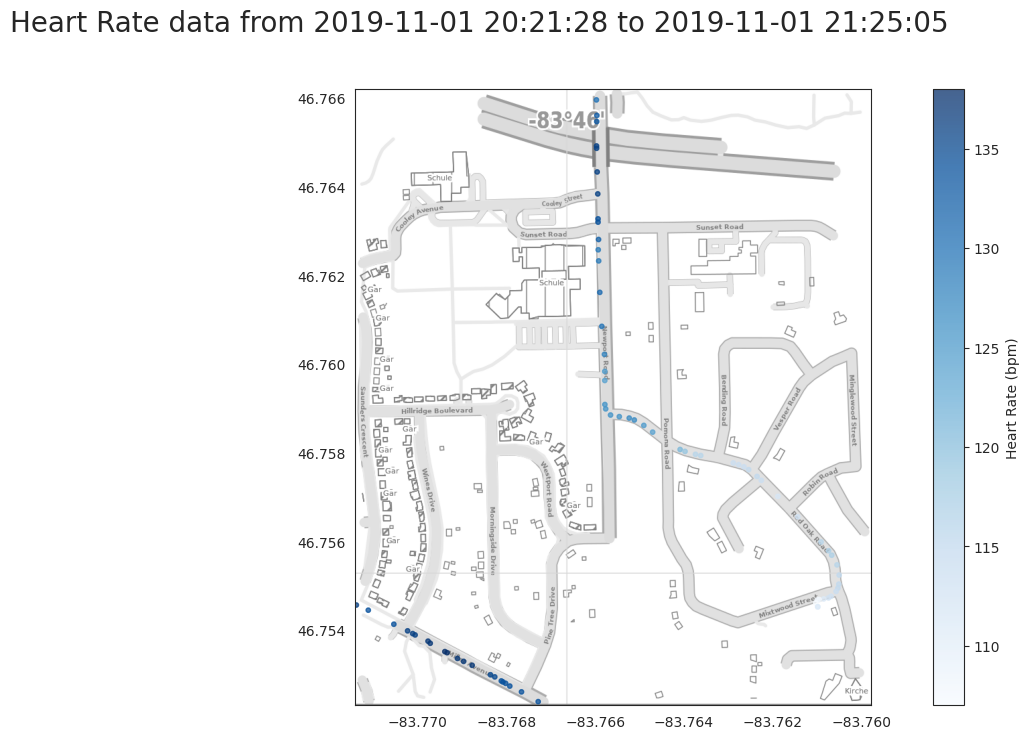

In [ ]:
plt.imshow(image,alpha=0.5,extent=[-83.77141,-83.75977,46.75230,46.76620])

small_df = df[(df["position_long_degrees"] > -83.77141) &
              (df["position_long_degrees"] < -83.75977) &
              (df["position_lat_degrees_mercantor"] > 46.75230) &
              (df["position_lat_degrees_mercantor"] < 46.76620)]

plt.scatter(small_df["position_long_degrees"],small_df["position_lat_degrees_mercantor"],
            s=10, c=small_df["heart_rate"], cmap='Blues', alpha=0.75)

plt.colorbar().set_label('Heart Rate (bpm)')

plt.suptitle("Heart Rate data from {} to {}".format(np.min(small_df["timestamp"]),np.max(small_df["timestamp"])),size='20')

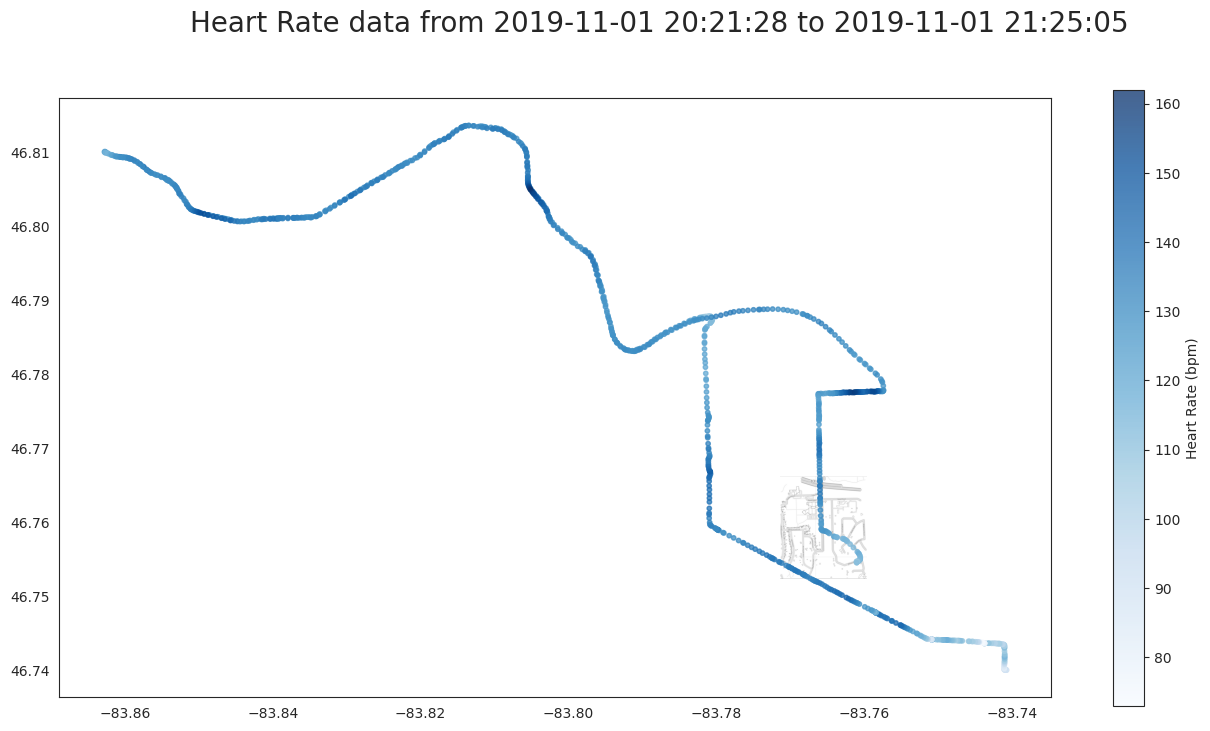

In [ ]:
# Let's see the exact same code, but with all of the data points in it
plt.imshow(image, alpha=0.5, extent=[-83.77141,-83.75977,46.75230,46.76620])
plt.scatter(df["position_long_degrees"],df["position_lat_degrees_mercantor"],
            s=10, c=df["heart_rate"], cmap='Blues', alpha=0.75)
plt.colorbar().set_label("Heart Rate (bpm)")
plt.suptitle("Heart Rate data from {} to {}".format(np.min(small_df["timestamp"]),np.max(small_df["timestamp"])),size='20');

In [ ]:
import folium

m = folium.Map(location=[42.24,-83.764],zoom_start=12)
display(m)

In [ ]:
m = folium.Map(location=[42.24,-83.764],zoom_start=15)
folium.Marker([df['position_lat_degrees'].iloc[0],df['position_long_degrees'].iloc[0]],
              popup='Start').add_to(m)
folium.Marker([df['position_lat_degrees'].iloc[-1],df['position_long_degrees'].iloc[-1]],
              popup='Stop').add_to(m)

route=folium.PolyLine(locations=zip(df['position_lat_degrees'], df['position_long_degrees']),
                      weight=5,color='blue').add_to(m)

display(m)